<a href="https://colab.research.google.com/github/szm7/AML/blob/main/2348551_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

In [227]:
data = pd.read_csv('/content/Program_3a_Dataset.csv')

In [228]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [229]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [230]:
data['y'].unique()

array(['no', 'yes'], dtype=object)

In [231]:
data['campaign'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43])

In [232]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [233]:
data_predictor = data[['duration', 'age', 'campaign','y']]

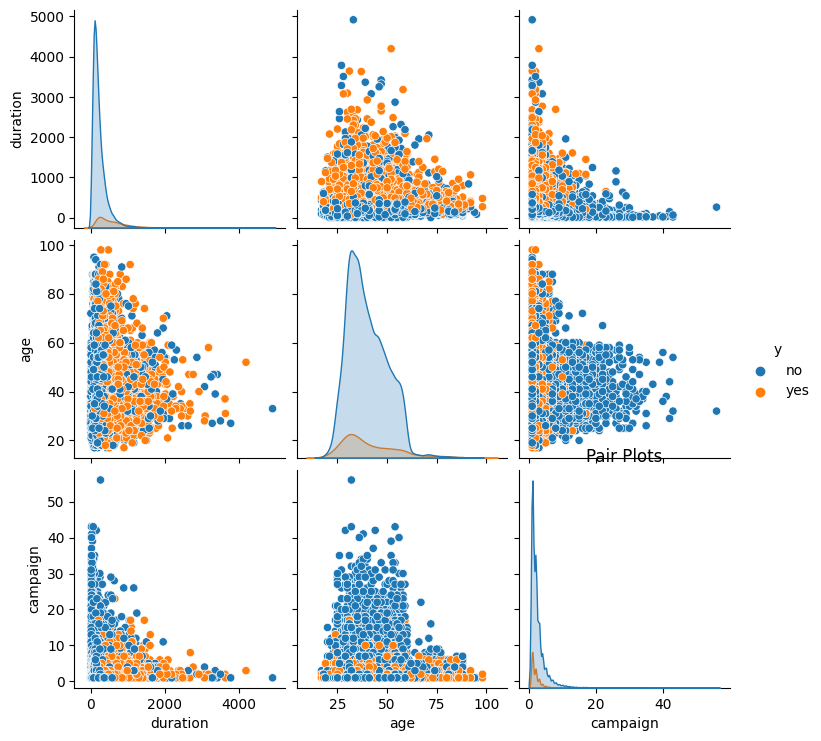

In [234]:
sns.pairplot(data_predictor, hue='y')
plt.title('Pair Plots')
plt.show()

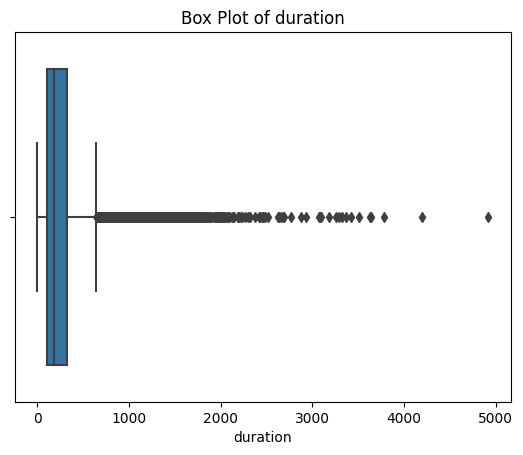

In [235]:
sns.boxplot(x='duration', data=data_predictor)
plt.title('Box Plot of duration')
plt.show()

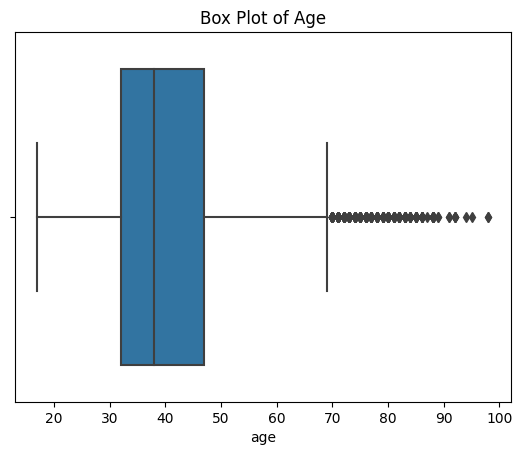

In [236]:
sns.boxplot(x='age', data=data_predictor)
plt.title('Box Plot of Age')
plt.show()

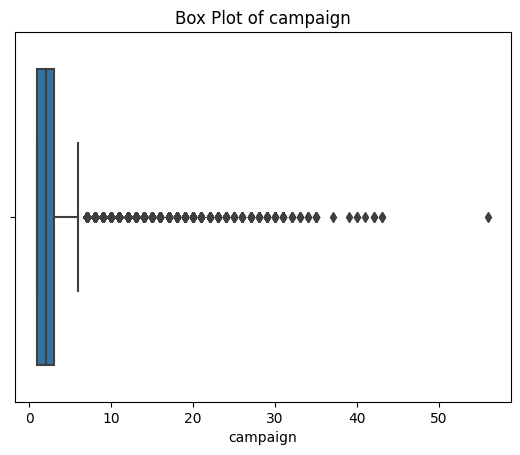

In [237]:
sns.boxplot(x='campaign', data=data_predictor)
plt.title('Box Plot of campaign')
plt.show()

<ipython-input-238-03c5d3ba0a69>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_predictor.corr()


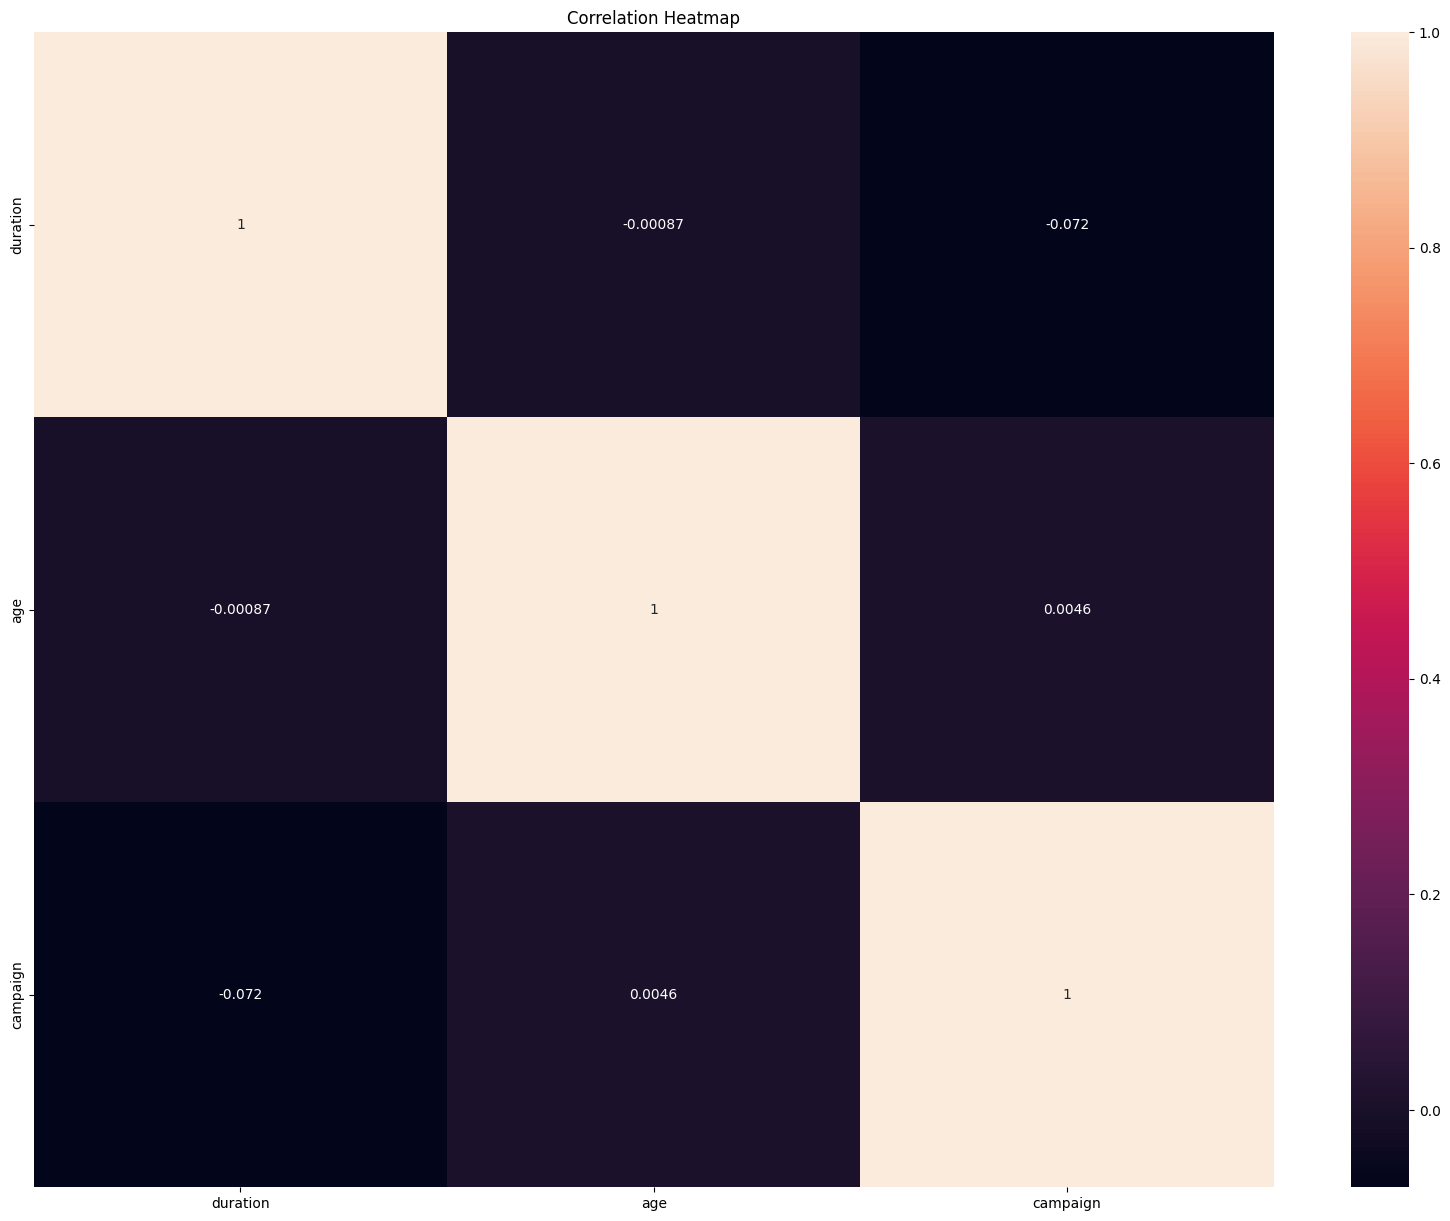

In [238]:
correlation_matrix = data_predictor.corr()

# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True,)
plt.title('Correlation Heatmap')
plt.show()

In [239]:
data_predictor['y'].unique()

array(['no', 'yes'], dtype=object)

In [240]:
y = data_predictor['y']
x = data_predictor.drop("y",axis=1)

In [241]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [263]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

LogisticRegression()

In [264]:
from sklearn.metrics import accuracy_score
x_test_prediction = lgr.predict(x_test)
x_train_prediction = lgr.predict(x_train)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
train_data_accuracy = accuracy_score(x_train_prediction, y_train)
print('Accuracy score of the test data : ', test_data_accuracy)
print('Accuracy score of the train data : ', train_data_accuracy)

Accuracy score of the test data :  0.8949583232176095
Accuracy score of the train data :  0.8927543269397523


In [266]:
from sklearn.metrics import accuracy_score, classification_report
print("Classification Report on Testing Set:")
print(classification_report(y_test, x_test_prediction))

Classification Report on Testing Set:
              precision    recall  f1-score   support

          no       0.91      0.98      0.94     10969
         yes       0.61      0.18      0.28      1388

    accuracy                           0.89     12357
   macro avg       0.76      0.58      0.61     12357
weighted avg       0.87      0.89      0.87     12357



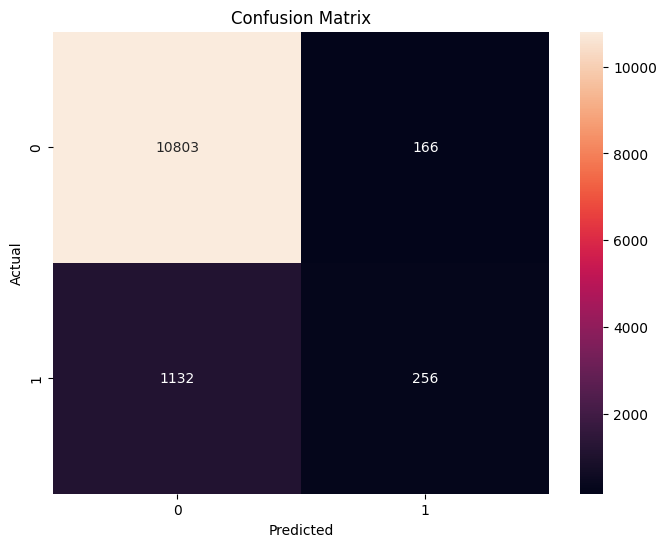

In [265]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, x_test_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [245]:
data1=pd.read_csv('/content/Program_3b_dataset.csv')

In [246]:
data1.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


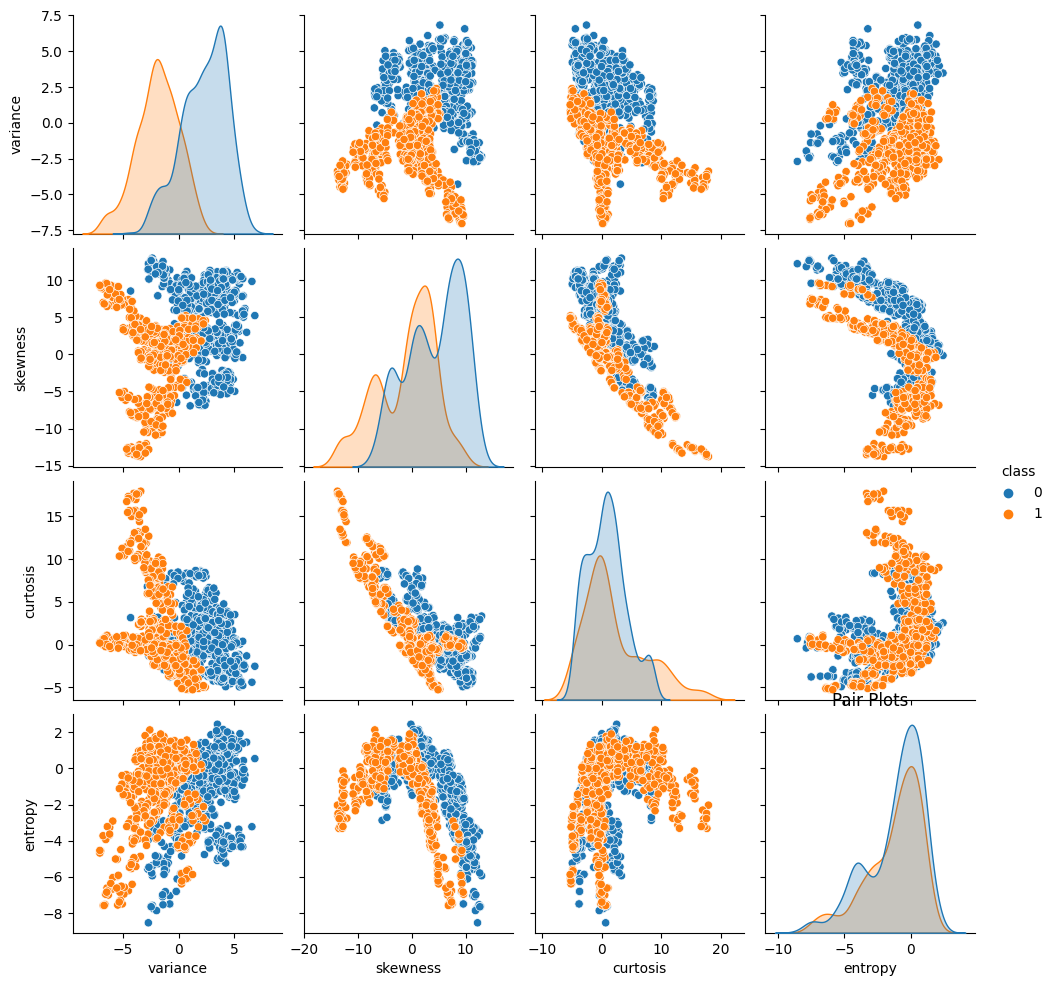

In [247]:
sns.pairplot(data1, hue='class')
plt.title('Pair Plots')
plt.show()

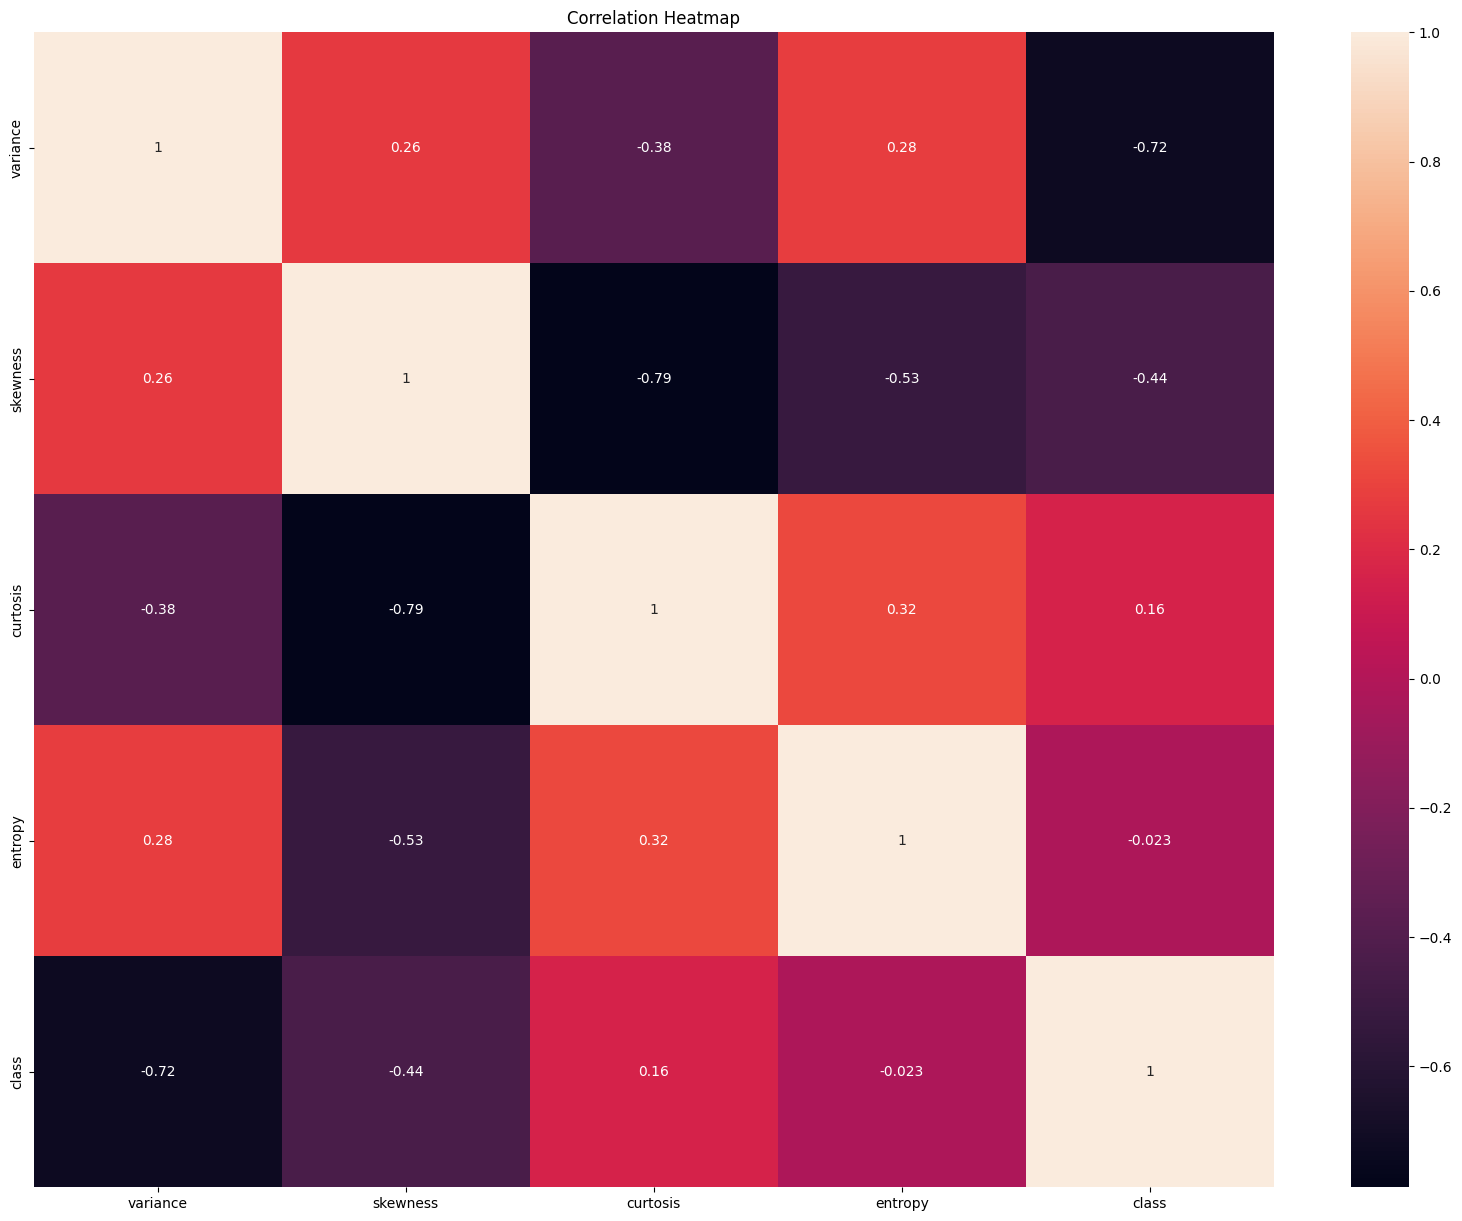

In [248]:
correlation_matrix = data1.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True,)
plt.title('Correlation Heatmap')
plt.show()

In [249]:
y1 = data1['class']
x1 = data1.drop("class",axis=1)

In [250]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.30,random_state=42)

In [261]:
from sklearn.metrics import accuracy_score
lgr1 = LogisticRegression()
lgr1.fit(x1_train,y1_train)
x1_test_prediction = lgr1.predict(x1_test)
x1_train_prediction = lgr1.predict(x1_train)
test_data1_accuracy = accuracy_score(x1_test_prediction, y1_test)
train_data1_accuracy = accuracy_score(x1_train_prediction, y1_train)
print('Accuracy score of the test data : ', test_data1_accuracy)
print('Accuracy score of the train data : ', train_data1_accuracy)

Accuracy score of the test data :  0.9878640776699029
Accuracy score of the train data :  0.9916666666666667


In [259]:
from sklearn.metrics import accuracy_score, classification_report
print("Classification Report on Testing Set:")
print(classification_report(y1_test, x1_test_prediction))

Classification Report on Testing Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



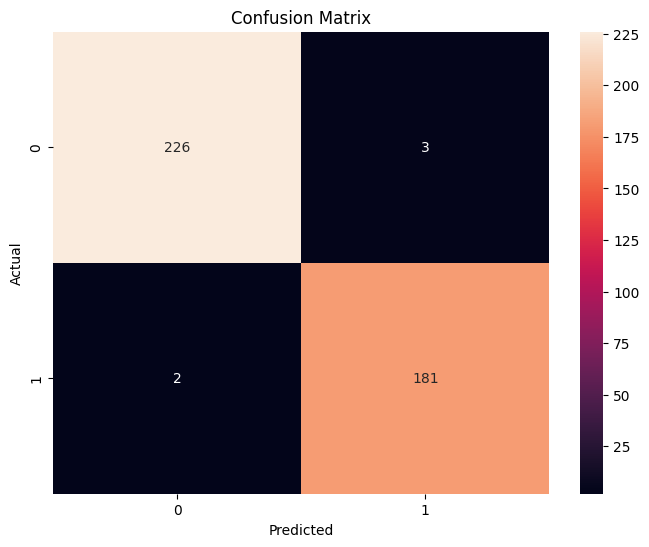

In [253]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y1_test, x1_test_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()